# Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable.So we have to predict flight ticket price.Since price is a continuous data,So this is a Regression problem.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [3]:
train_df =pd.read_csv(r"C:/Users/swati/Downloads/Data_Train.csv")
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_df.shape

(10683, 11)

There are 10683 rows and 11 columns.

In [5]:
test_df =pd.read_csv(r"C:/Users/swati/Downloads/Test_set.csv")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [116]:
test_df.shape

(2671, 10)

There are 2671 rows and 10 columns.

In [6]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

All Independent features data types are object and Dependent Feature is numerical type.

In [8]:
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [9]:
test_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

All columns data type are object.

In [10]:
## Checking for missing columns:-
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Route and Total_stops has  one missing data in Train data. 

Dropping null values sice it is only one and dataset is big enough.

In [11]:
train_df.dropna(inplace=True)

In [77]:
train_df.shape

(10682, 11)

In [11]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
No missing values in train data.

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


There is not any missing data.

In [13]:
## Let us Again check for null values:-
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Route and Total_Stops has 1 missing value.

In [14]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There are not any null values in data set.

In [15]:
train_df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4536,4536,2376,233,423,550,5625,8344,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.214567
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.548810
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


Since all columns have categorical data,So These type of statistics are shown.

In [17]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

There are 12 unique type of Airlines values in train data.

In [19]:
test_df['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

There are 11 unique type of Airlines values in test data.

In [18]:
train_df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

There are 5 unique type of Source values in train data.

In [20]:
test_df['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

There are 5 unique type of Source values in test data.

In [21]:
train_df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
There are 6 unique type of destination values in train data.

In [22]:
test_df['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [ ]:
There are 6 unique type of destination values in test data.

In [23]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
Theres are 5  unique type of Total_stops values in Train data.

In [24]:
test_df['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

Theres are 5 unique type of Total_stops values in Test data.

In [26]:
train_df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Theres are 10 unique type of Additional_Info values in Train data.

In [27]:
test_df['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
Business class                     1
1 Long layover                     1
Name: Additional_Info, dtype: int64

In [31]:
## pd.set_option('dispaly_max.columns',None)
train_df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
5m           1
3h 25m       1
27h 30m      1
32h 55m      1
42h 45m      1
Name: Duration, Length: 368, dtype: int64

In [32]:
test_df['Duration'].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
33h 45m      1
31h 55m      1
29h 55m      1
27h 30m      1
32h 5m       1
Name: Duration, Length: 320, dtype: int64

# EDA

As Date_of_Journey,Dep_Time and Arrival_Time,Duration columns  data are not  in String format,So will convert these column data's into numerical format.

In [12]:
train_df['doj'] =pd.DatetimeIndex(train_df['Date_of_Journey']).day

In [13]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,doj
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3


In [14]:
## same for test data:
test_df['doj'] =pd.DatetimeIndex(test_df['Date_of_Journey']).day
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,doj
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,21
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24


In [15]:
## Month Extraction:-
train_df['journey_month'] =pd.DatetimeIndex(train_df['Date_of_Journey']).month
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,doj,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [16]:
##  Test data Month Extraction:-
test_df['journey_month'] =pd.DatetimeIndex(test_df['Date_of_Journey']).month
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,doj,journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


No need to extract year ,beacuse same year's 2019 data is given.

In [17]:
##Now Let us  drop Date of journey column:
train_df.drop('Date_of_Journey',axis=1,inplace=True)
test_df.drop('Date_of_Journey',axis=1,inplace=True)


In [22]:
train_df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,doj,journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [23]:
test_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,doj,journey_month
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [18]:
## Let us convert Departure time into proper format:-
train_df['Dep_hour']= pd.DatetimeIndex(train_df['Dep_Time']).hour

In [19]:
train_df['Dep_minute']=pd.DatetimeIndex(train_df['Dep_Time']).minute

In [26]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,doj,journey_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [20]:
## same for test data:
test_df['Dep_hour']= pd.DatetimeIndex(test_df['Dep_Time']).hour
test_df['Dep_minute']=pd.DatetimeIndex(test_df['Dep_Time']).minute

In [28]:
test_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,doj,journey_month,Dep_hour,Dep_minute
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,5,12,6,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [21]:
## Let us convert Arrival time into proper format:-
train_df['Arrival_hour']= pd.DatetimeIndex(train_df['Arrival_Time']).hour
train_df['Arrival_minute']= pd.DatetimeIndex(train_df['Arrival_Time']).minute


In [30]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,doj,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [22]:
## Let us drop Arrival time column,because we have created columns for Arrival hour and minute.
train_df.drop('Arrival_Time',axis=1,inplace=True)

In [32]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,doj,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Arrival_Time column got deleted.

In [23]:
## Let us convert Arrival time into proper format into test data :-
test_df['Arrival_hour']= pd.DatetimeIndex(test_df['Arrival_Time']).hour
test_df['Arrival_minute']= pd.DatetimeIndex(test_df['Arrival_Time']).minute


In [24]:
## Let us drop Arrival time column,because we have created columns for Arrival hour and minute.
test_df.drop('Arrival_Time',axis=1,inplace=True)

In [64]:
test_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,doj,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,17:30,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,4h,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:15,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,08:00,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,23:55,2h 50m,non-stop,No info,24,6,23,55,2,45


In [25]:
## Let us convert Duration column into Hour and minute format:-
## Creating empty lists to contain hours and minute data
duration_hours =[]
duration_minutes =[]

duration = list(train_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+ " 0m"
        else:
            duration[i] = "0h " +duration[i]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_minutes.append(int(duration[i].split(sep="m")[0].split()[-1]))
    
#print(duration_hours)
#print(duration_minutes)
    
             
        

In [26]:
train_df["Duration_hours"] = duration_hours
train_df["Duration_min"] = duration_minutes


In [37]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,doj,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,19h,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [27]:
train_df.drop('Duration',axis=1,inplace = True )

In [39]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,doj,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [28]:
## Let us convert Duration column into Hour and minute format in test data:-
## Creating empty lists to contain hours and minute data
duration_hours =[]
duration_minutes =[]

duration = list(test_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+ " 0m"
        else:
            duration[i] = "0h " +duration[i]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_minutes.append(int(duration[i].split(sep="m")[0].split()[-1]))
    
#print(duration_hours)
#print(duration_minutes)


In [29]:
test_df["Duration_hours"] = duration_hours
test_df["Duration_min"] = duration_minutes


In [30]:
test_df.drop('Duration',axis=1,inplace = True )

In [44]:
test_df.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,doj,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,17:30,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,1 stop,No info,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:15,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,08:00,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,23:55,non-stop,No info,24,6,23,55,2,45,2,50


 So we can see Duration column's data is converted into hour and minute data in both test and train data. 

Duration column deleted.

# Visualization

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'doj'}>,
        <AxesSubplot:title={'center':'journey_month'}>],
       [<AxesSubplot:title={'center':'Dep_hour'}>,
        <AxesSubplot:title={'center':'Dep_minute'}>,
        <AxesSubplot:title={'center':'Arrival_hour'}>],
       [<AxesSubplot:title={'center':'Arrival_minute'}>,
        <AxesSubplot:title={'center':'Duration_hours'}>,
        <AxesSubplot:title={'center':'Duration_min'}>]], dtype=object)

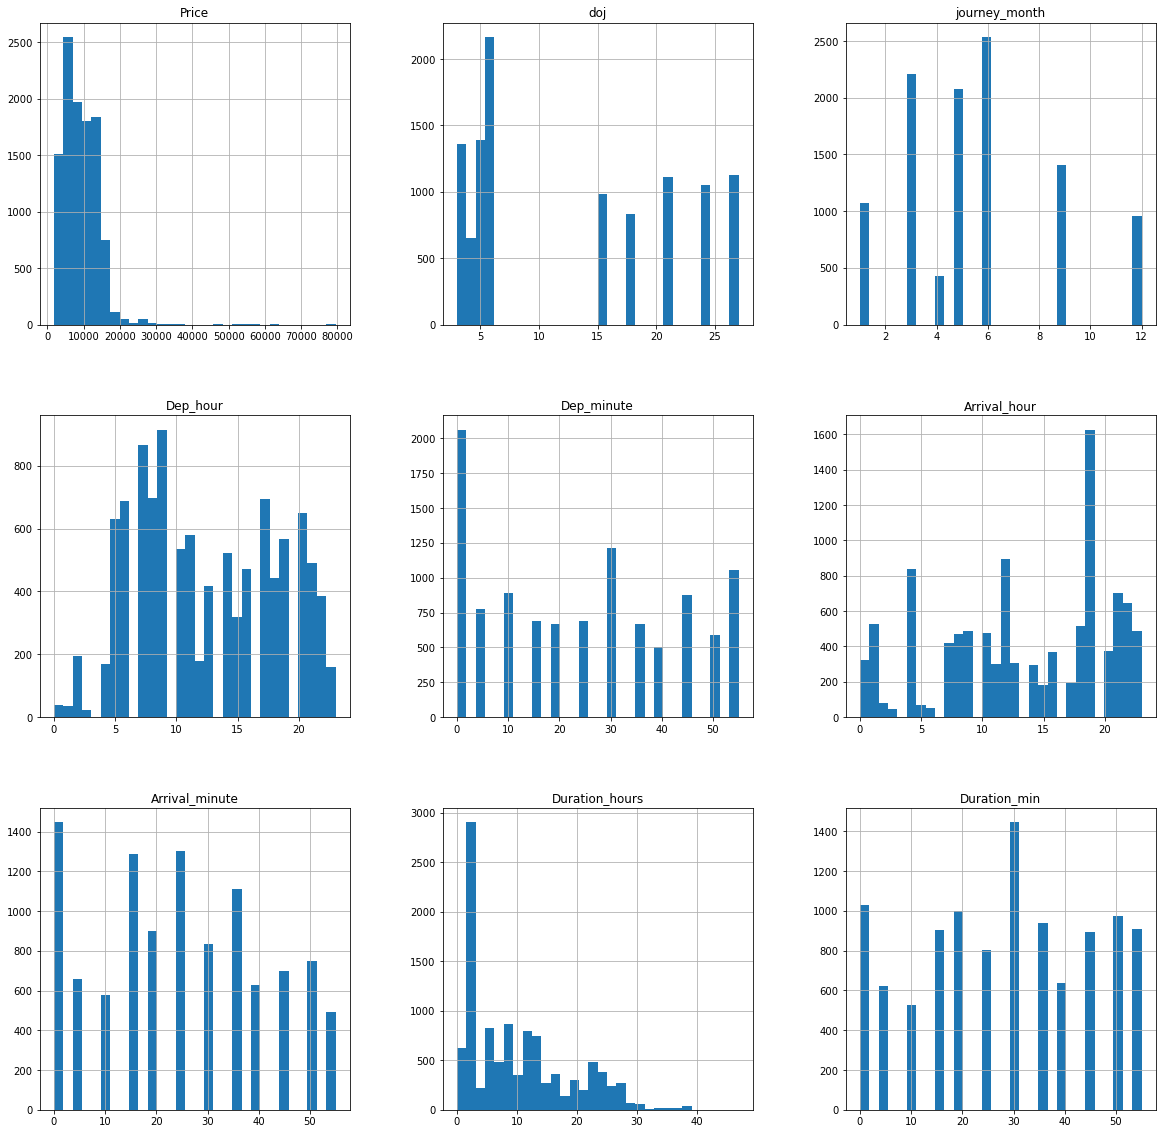

In [45]:
train_df.hist(figsize=(20,20),bins=30)

# Univaraiate Analysis:-

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

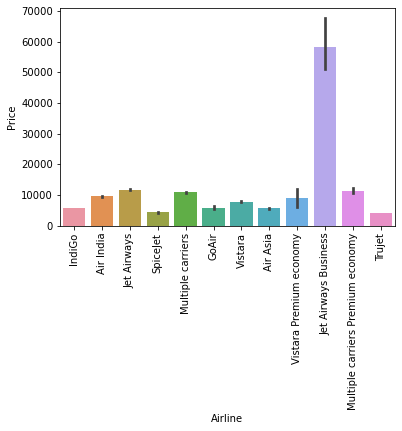

In [89]:
## let us check each indepent column relation with dependent column:-

## Airline vs price:-
sns.barplot(x="Airline",y="Price",data=train_df)
plt.xticks(rotation=90)


jet Airways  has the highest price and  Trujet has lowest price.

<AxesSubplot:xlabel='Source', ylabel='Price'>

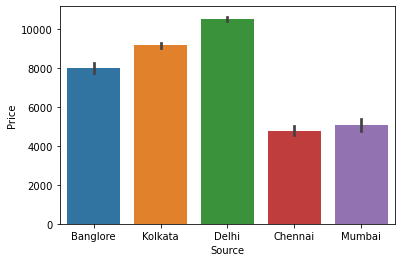

In [90]:
sns.barplot(x="Source",y="Price",data=train_df)


From Delhi  as source ,prices  are high.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

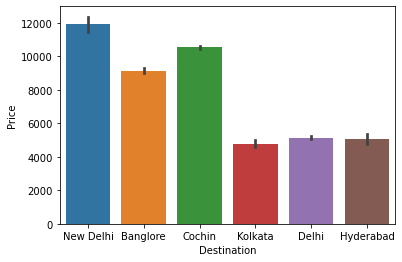

In [91]:
sns.barplot(x="Destination",y="Price",data=train_df)


From Delhi  as destination ,prices  are high.

<AxesSubplot:xlabel='Route', ylabel='Price'>

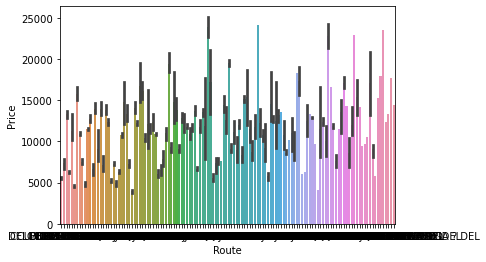

In [94]:
sns.barplot(x="Route",y="Price",data=train_df)


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

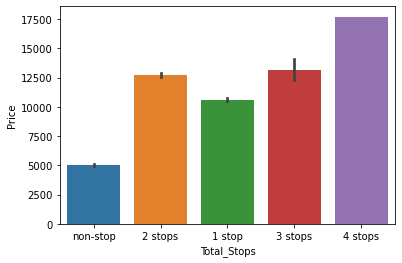

In [95]:
sns.barplot(x="Total_Stops",y="Price",data=train_df)


In [ ]:
Total stopts 4 has the highest price.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

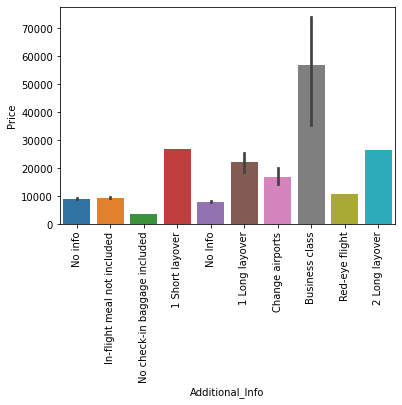

In [98]:
sns.barplot(x="Additional_Info",y="Price",data=train_df)
plt.xticks(rotation =90)


Business class has the highest price.

# Multivaraiate Analysis:-

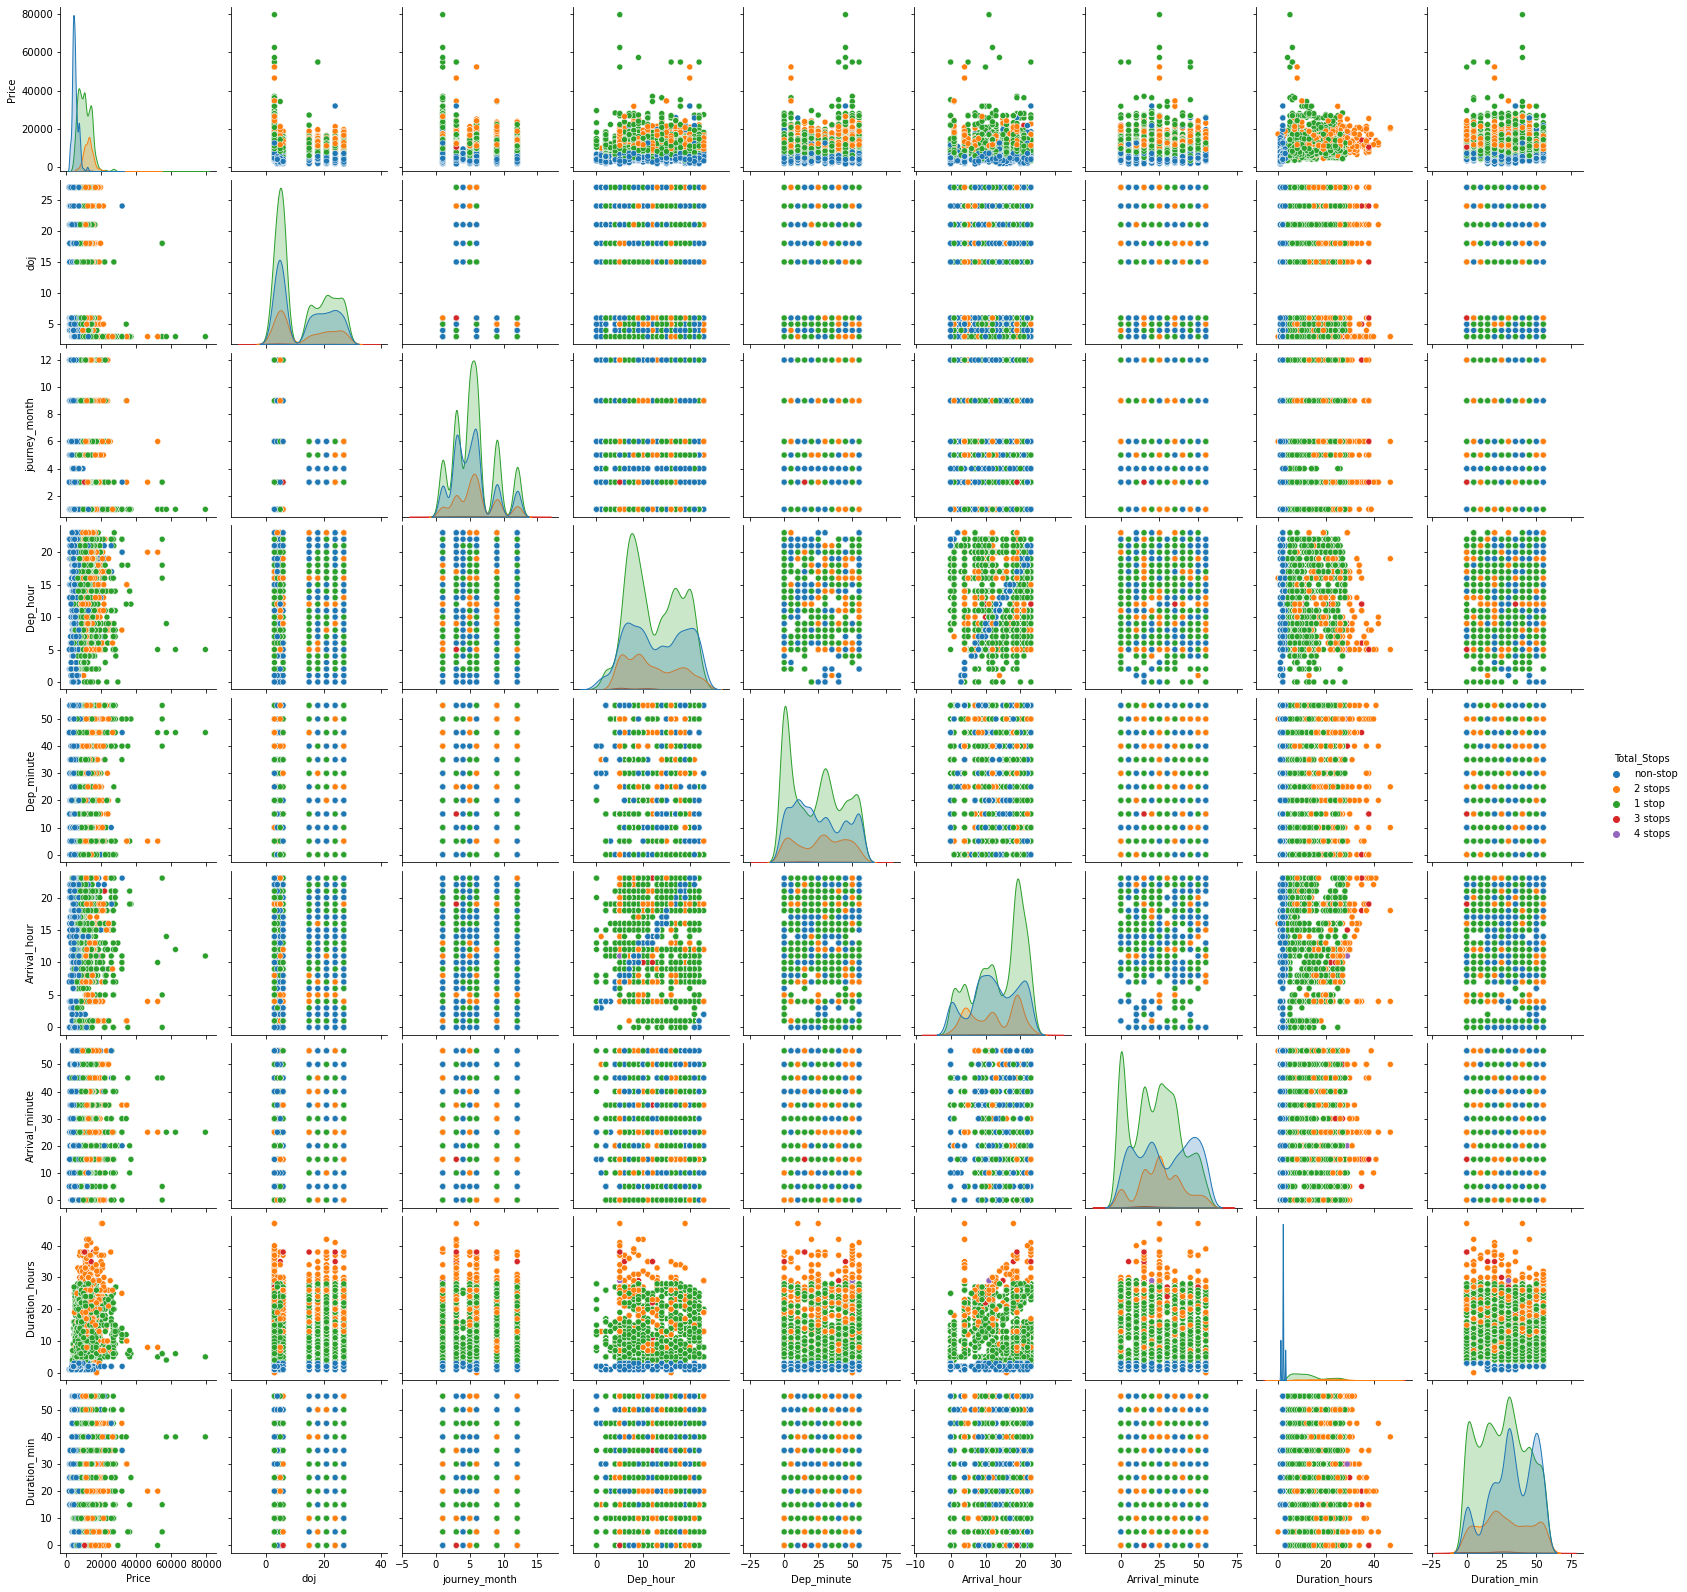

In [101]:
sns.pairplot(train_df,hue='Total_Stops')

# Correlation Matrix:-

In [104]:
corr = train_df.corr()
corr

,Price,doj,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_min
Price,1.000000,-0.165448,0.010705,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
doj,-0.165448,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423,-0.037964,-0.007708
journey_month,0.010705,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786,0.055552,-0.018597
Dep_hour,0.006799,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
Dep_minute,-0.024458,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485
Arrival_hour,0.024244,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309
Arrival_minute,-0.086155,-0.021423,-0.025786,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628
Duration_hours,0.508778,-0.037964,0.055552,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468
Duration_min,-0.124855,-0.007708,-0.018597,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000


<AxesSubplot:>

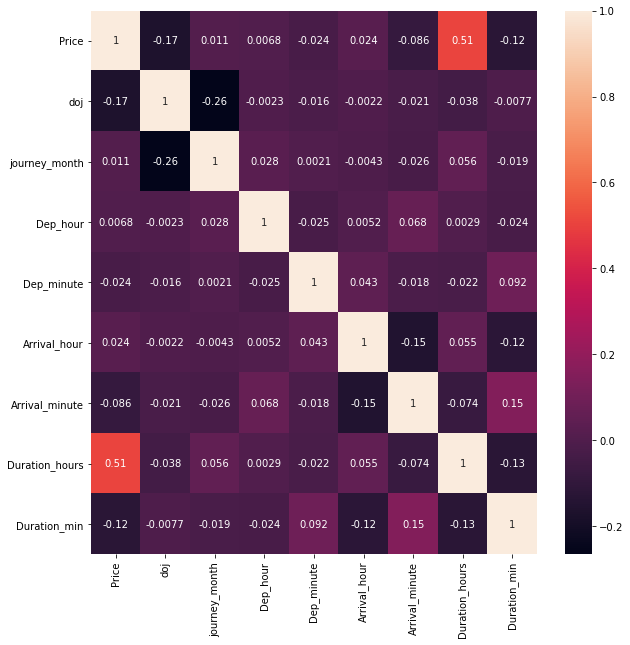

In [109]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot =True)

1.Price has positive good correlation with Duration_hours .
2.Price has  weak positive correlation with Arrival_hour,Dep_hour,Jouney_month.
3.Price has weak negative correlation with Duration_min,Arrival_minute,Dep_minute,and Date of journey(doj).

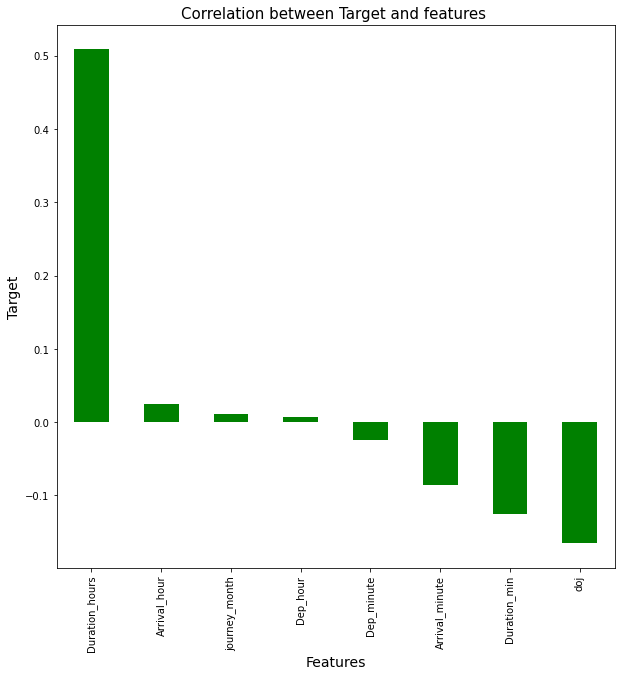

In [31]:
plt.figure(figsize=(10,10))
train_df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.xticks(rotation=90)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()


# Data Preprocessing

In [110]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   doj              10682 non-null  int64 
 9   journey_month    10682 non-null  int64 
 10  Dep_hour         10682 non-null  int64 
 11  Dep_minute       10682 non-null  int64 
 12  Arrival_hour     10682 non-null  int64 
 13  Arrival_minute   10682 non-null  int64 
 14  Duration_hours   10682 non-null  int64 
 15  Duration_min     10682 non-null  int64 
dtypes: int64(9), object(7)
memory usage: 1.6+ MB


1.Since we have extract hour and minute data from Dep_Time,so will drop Dep_Time column.
2.Additional_Info column has most values of No info ,So will delete this column.
3.Route column has detail of  stop between Source and Destinamtion,As in dataset source and destination columns are present,and Total stops is related to the route,So will delete route column also. 

In [32]:
train_df.drop(columns=['Dep_Time','Route','Additional_Info'],axis=1,inplace=True)

In [47]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,doj,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,16,50,21,35,4,45


In [97]:
train_df.shape

(10682, 13)

In [114]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Route            2671 non-null   object
 4   Dep_Time         2671 non-null   object
 5   Duration         2671 non-null   object
 6   Total_Stops      2671 non-null   object
 7   Additional_Info  2671 non-null   object
 8   doj              2671 non-null   int64 
 9   journey_month    2671 non-null   int64 
 10  Dep_hour         2671 non-null   int64 
 11  Dep_minute       2671 non-null   int64 
 12  Arrival_hour     2671 non-null   int64 
 13  Arrival_minute   2671 non-null   int64 
 14  Duration_hours   2671 non-null   int64 
 15  Duration_min     2671 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 334.0+ KB


In [33]:
test_df.drop(columns=['Dep_Time','Route','Additional_Info'],axis=1,inplace=True)

In [99]:
test_df.shape

(2671, 12)

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10682 non-null  object
 1   Source          10682 non-null  object
 2   Destination     10682 non-null  object
 3   Total_Stops     10682 non-null  object
 4   Price           10682 non-null  int64 
 5   doj             10682 non-null  int64 
 6   journey_month   10682 non-null  int64 
 7   Dep_hour        10682 non-null  int64 
 8   Dep_minute      10682 non-null  int64 
 9   Arrival_hour    10682 non-null  int64 
 10  Arrival_minute  10682 non-null  int64 
 11  Duration_hours  10682 non-null  int64 
 12  Duration_min    10682 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


# Converting Categorical columns into Numerical column:

In [34]:
categorical_cols = ['Airline', 'Source', 'Destination'] 
train_df = pd.get_dummies(train_df, columns = categorical_cols,drop_first=True)


In [35]:
train_df.head()

,Total_Stops,Price,doj,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [36]:
## Same with test data:
categorical_cols = ['Airline', 'Source', 'Destination'] 
test_df = pd.get_dummies(test_df, columns = categorical_cols,drop_first=True)


In [37]:
test_df.head()

,Total_Stops,doj,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1 stop,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1 stop,5,12,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1 stop,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,non-stop,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
## Now taking only numerical value from Total_Stops :-
train_df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [39]:
train_df.head()

,Total_Stops,Price,doj,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [40]:
test_df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [41]:
test_df.head()

,Total_Stops,doj,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
##Now all values are numerical.

# Again checking Correlation

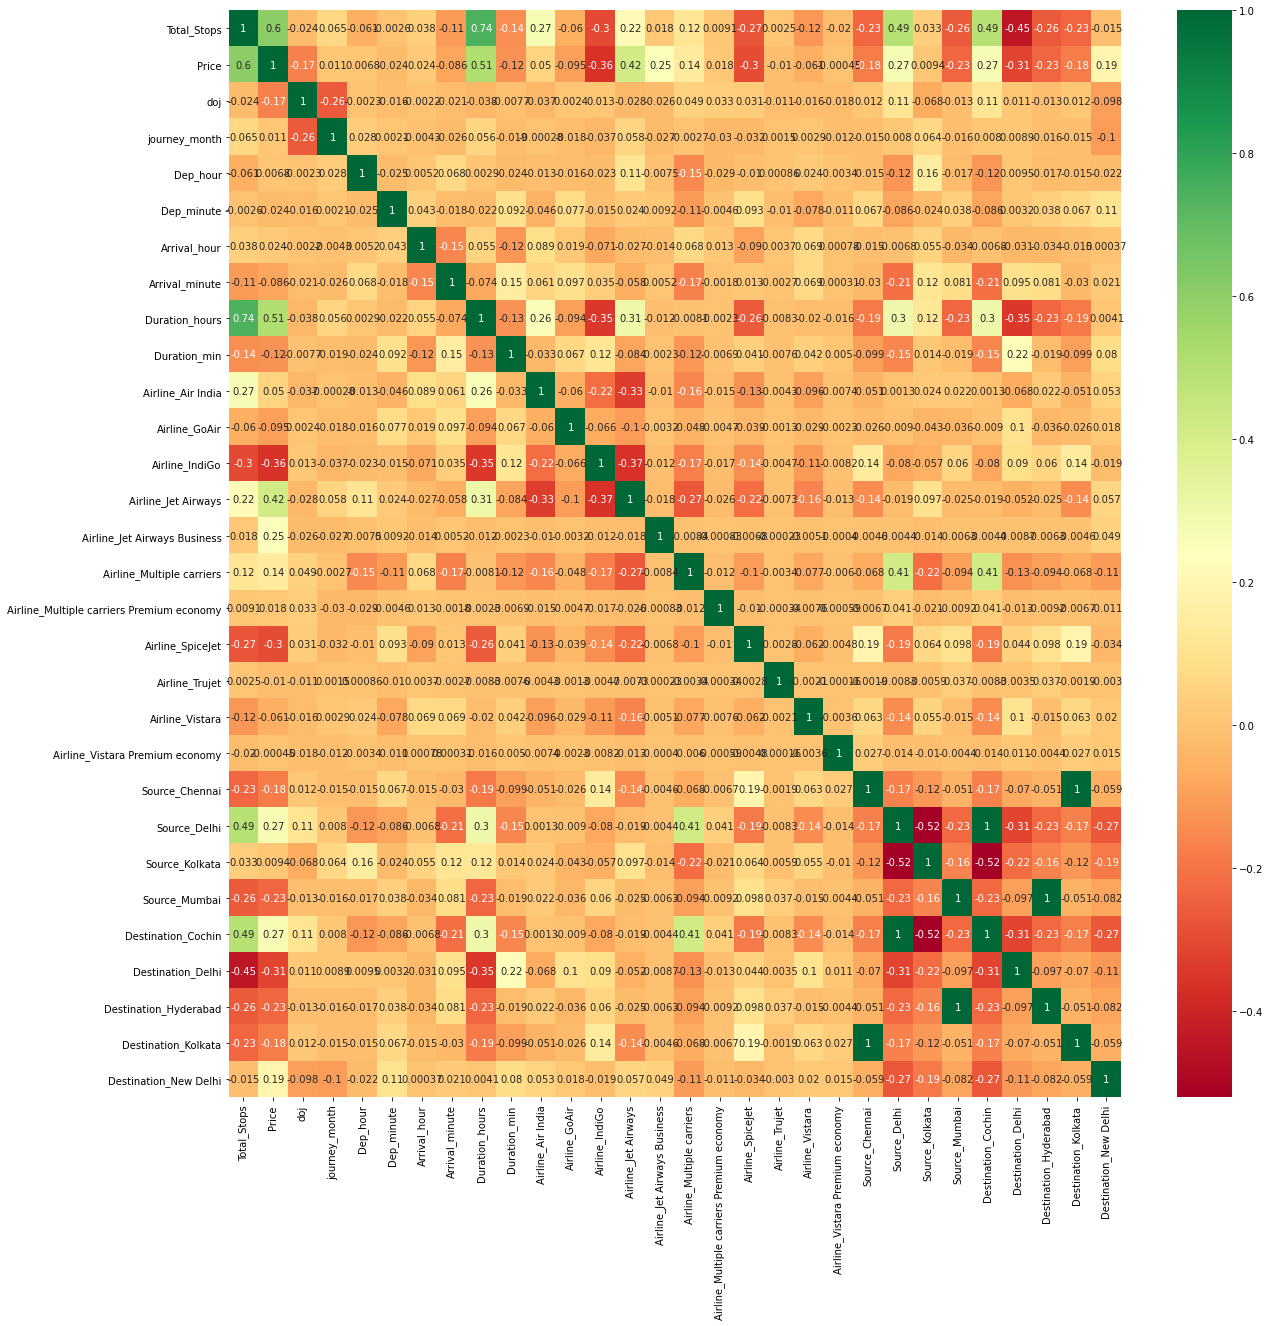

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(),annot =True,cmap='RdYlGn')
plt.show()

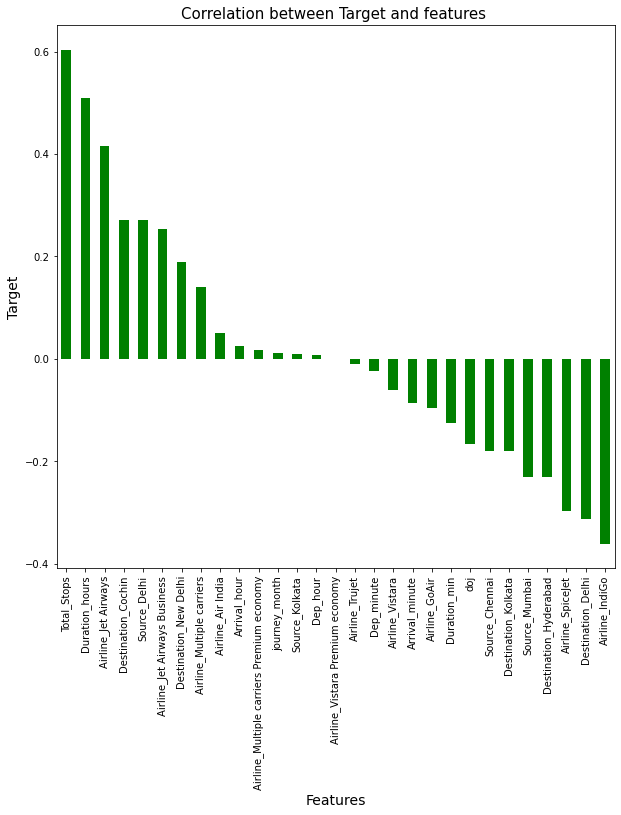

In [45]:
plt.figure(figsize=(10,10))
train_df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.xticks(rotation=90)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()


In [42]:
train_df.columns

Index(['Total_Stops', 'Price', 'doj', 'journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

# Outliers:

Since all independent columns have categorical data,so we will not check for outliers.

# Skewness

Since all independent columns have categorical data,so we will not check for skewness also.

# Splitting data between Features and labels:-

In [46]:
x = train_df.drop('Price',axis=1)
y= train_df['Price']

In [47]:
x.shape,y.shape

((10682, 29), (10682,))

# Scaling using Standard Scaler:-

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)


In [49]:
x.head()

,Total_Stops,doj,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.220666,1.285536,-0.848450,1.654154,-0.234950,-1.800436,-0.890014,-0.970614,1.279041,-0.442785,...,-0.016761,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,3.234405
1,1.741432,-0.872724,-1.517909,-1.303113,1.363607,-0.050909,-0.587094,-0.381999,-0.196319,2.258432,...,-0.016761,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
2,1.741432,-0.759131,1.159928,-0.607286,0.031476,-1.363054,0.018745,1.030677,-1.671678,-0.442785,...,-0.016761,-0.192319,1.164018,-0.606266,-0.264206,1.164018,-0.366513,-0.264206,-0.192319,-0.309176
3,0.260383,-0.872724,2.164117,0.958326,-1.034229,1.407030,0.321664,-0.617445,-0.196319,-0.442785,...,-0.016761,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
4,0.260383,-1.099909,-1.517909,0.610412,1.363607,1.115442,0.624584,-0.735168,0.983969,-0.442785,...,-0.016761,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,3.234405


Now all values are standardized.

# Finding Best Random State:-

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf = RandomForestRegressor()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    score=r2_score(y_test, pred)
    if score>maxscore:
        maxscore=score
        maxRS=i
print("Best accuracy is ",maxscore," on Random_state ",maxRS)


Best accuracy is  0.8387629173560328  on Random_state  13


In [51]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.model_selection import GridSearchCV,cross_val_score
from  sklearn.metrics import mean_absolute_error,mean_squared_error


lr=LinearRegression()
dtr=DecisionTreeRegressor()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
adb=AdaBoostRegressor()


In [52]:
algorithm=[lr,dtr,rf,knn,adb]
acc_models={}
for model in algorithm:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print("-"*100)
    acc_models[model]=round(r2_score(y_test,pred)*100,2)
    print(f"The model {model} has:: \n\t Accuracy :: {round(r2_score(y_test,pred)*100,1)}% \n\t Mean Absolute Error is :: {mean_absolute_error(y_test,pred)} \n\t Mean Squared Error is :: {mean_squared_error(y_test,pred)} \n\t Root Mean Squared Error is :: {np.sqrt(mean_squared_error(y_test,pred))}")
    print("-"*60)
    print("\n")

----------------------------------------------------------------------------------------------------
The model LinearRegression() has:: 
	 Accuracy :: 63.8% 
	 Mean Absolute Error is :: 1998.0841692782467 
	 Mean Squared Error is :: 8400098.155709956 
	 Root Mean Squared Error is :: 2898.2922826571435
------------------------------------------------------------


----------------------------------------------------------------------------------------------------
The model DecisionTreeRegressor() has:: 
	 Accuracy :: 71.4% 
	 Mean Absolute Error is :: 1346.121840873635 
	 Mean Squared Error is :: 6639953.346687295 
	 Root Mean Squared Error is :: 2576.8106928308284
------------------------------------------------------------


----------------------------------------------------------------------------------------------------
The model RandomForestRegressor() has:: 
	 Accuracy :: 79.1% 
	 Mean Absolute Error is :: 1197.8894270567705 
	 Mean Squared Error is :: 4859900.255584594 
	 Root 

# Cross Validation:-

In [55]:
cv_model={}
for model in algorithm:
    cvscore_={}
    print(f"\n{model}")
    print("-"*50)
    print("\n")
    for i in range(2,10):
        cvs = cross_val_score(model,x,y,cv=i)
        cvscore_[i]=cvs.mean()
        print(f"Mean of CV score model{model} is {cvscore_[i]} at k fold {i}\n" )
    CVdata=pd.DataFrame(cvscore_,index=[""])
    cv_model[str(model)]=CVdata.max(axis=1).tolist()    


LinearRegression()
--------------------------------------------------


Mean of CV score modelLinearRegression() is 0.6131033904850506 at k fold 2

Mean of CV score modelLinearRegression() is -1546420928.9529066 at k fold 3

Mean of CV score modelLinearRegression() is -164344525.78083897 at k fold 4

Mean of CV score modelLinearRegression() is -21935349.76743912 at k fold 5

Mean of CV score modelLinearRegression() is -3331940.532862824 at k fold 6

Mean of CV score modelLinearRegression() is 0.6141898221171849 at k fold 7

Mean of CV score modelLinearRegression() is -376631.276961517 at k fold 8

Mean of CV score modelLinearRegression() is 0.6139390141785446 at k fold 9


DecisionTreeRegressor()
--------------------------------------------------


Mean of CV score modelDecisionTreeRegressor() is 0.6656545526690784 at k fold 2

Mean of CV score modelDecisionTreeRegressor() is 0.6634430899658986 at k fold 3

Mean of CV score modelDecisionTreeRegressor() is 0.6797582344276583 at k fold 

In [57]:
score=list(acc_models.values ( ))

m=list(cv_model.keys())

print("The least difference between the r2-score and CV score of each model is:\n")
for i in range(5):
    print(f"{m[i]}:{round(np.abs(cv_model[m[i]][0]*100-score[i]),2)}")

The least difference between the r2-score and CV score of each model is:

LinearRegression():2.42
DecisionTreeRegressor():2.09
RandomForestRegressor():0.9
KNeighborsRegressor():3.13
AdaBoostRegressor():10.17


The least difference between the r2-score and CV score for Random Forest Model.

In [ ]:
sns.distplot(y_test-pred)
plt.show()

# Plotting regplot graph

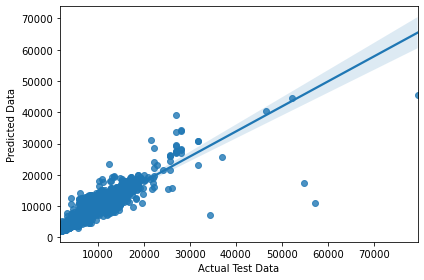

In [58]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
sns.regplot(y_test,pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

# Regularization

In [61]:
lasso=Lasso()
parameters={"alpha":np.arange(0.0001,0.1,0.001),'normalize':[True,False],'max_iter':[1000,1500,2000]}
clf=GridSearchCV(lasso,parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'alpha': 0.0011, 'max_iter': 1000, 'normalize': True}

In [62]:
## Providing best parameters:-
lasso=Lasso(alpha= 0.09910000000000001, max_iter= 1000, normalize=True)
lasso.fit(x_train,y_train)
pred=lasso.predict(x_test)
r2_score(y_test,pred)*100

63.81926213756459

# HyperParameter Tuning 


In [65]:
params = {
          'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],
          'max_features':["auto","sqrt","log2"],
    
         }
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf,params)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)


{'criterion': 'friedman_mse', 'max_features': 'auto'}


In [66]:
rf = RandomForestRegressor(criterion='friedman_mse',max_features='auto')

rf.fit(x_train,y_train)
predict_rd = rf.predict(x_test)

score = r2_score(y_test,predict_rd)
score


0.7924438331608076

# Model Saving

In [68]:
import pickle
filename = 'Flight_fare_Prediction.pickle'
pickle.dump(rf,open(filename,'wb'))


# Conclusion

In [69]:
## Conclusion : -
a =np.array(y_test)
predicted = np.array(rf.predict(x_test))
df =  pd.DataFrame({ 'Original' : a,
                     'predicted' :predicted ,
                   },index = range(len(a))) 
df


,Original,predicted
0,12760,12640.495833
1,10844,14415.819167
2,5021,6836.420000
3,8529,12023.020000
4,3100,2452.560000
...,...,...
3200,14300,14012.177500
3201,20120,19179.240000
3202,10676,9944.245000
3203,10262,10343.442500
